/var/folders/31/kg77rvcd7kgbdlzgklh61x240000gn/T/ipykernel_37892/4263497082.py:32: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  img_gaussian = filters.gaussian_filter(img_original, gaussian_coef*i)
/var/folders/31/kg77rvcd7kgbdlzgklh61x240000gn/T/ipykernel_37892/4263497082.py:44: DeprecationWarning: Please use `sobel` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.sobel(img_gaussian, 1, img_grad_x)
/var/folders/31/kg77rvcd7kgbdlzgklh61x240000gn/T/ipykernel_37892/4263497082.py:46: DeprecationWarning: Please use `sobel` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.sobel(img_gaussian, 0, img_grad_y)


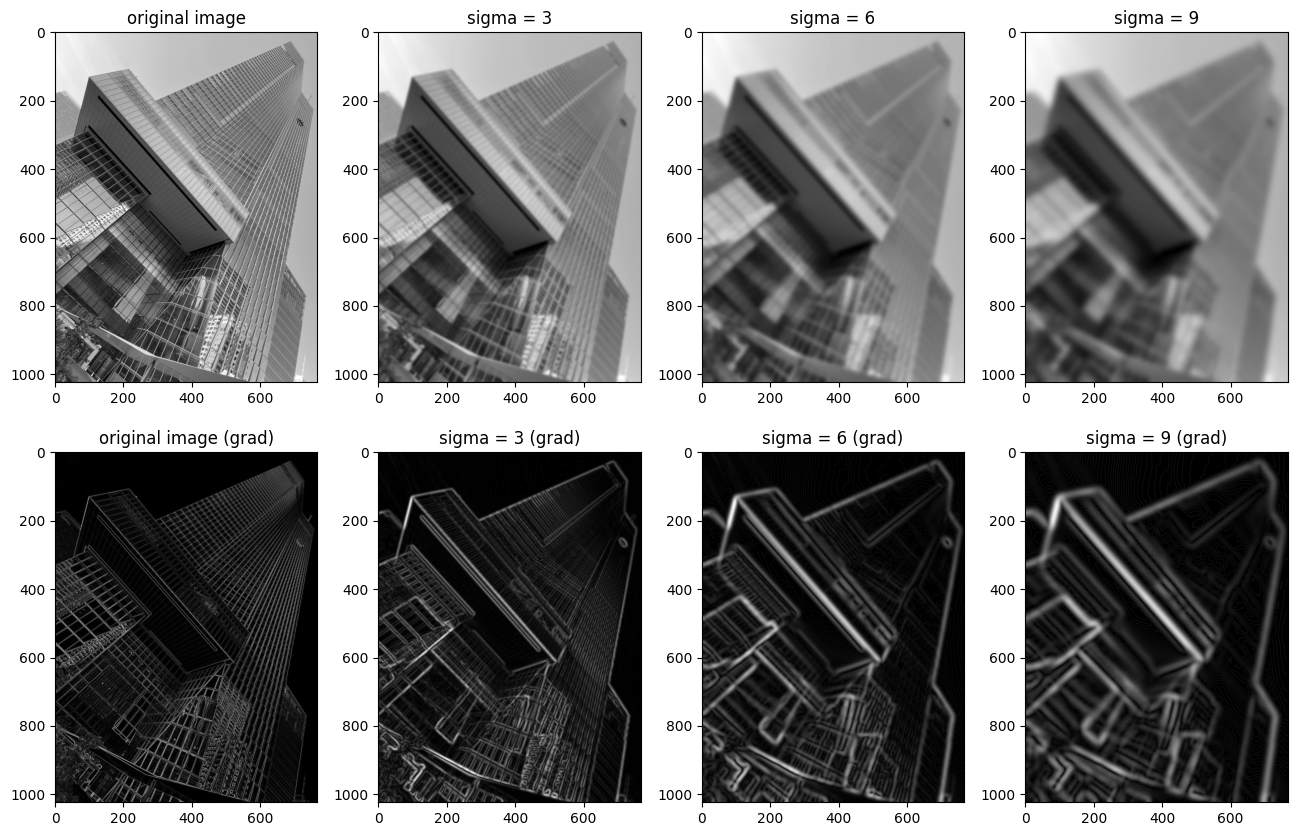

In [62]:
## Exercise 01
from PIL import Image
from numpy import *
from pylab import *
from scipy.ndimage import filters
from scipy import misc

# declare coefficients
gaussian_coef = 3
gaussed_img_num = 4

# read image to array
img_original = array(Image.open('data/ex01_sample_ver01.jpg').convert('L'))

# create new fig
figure(figsize=(gaussed_img_num*4,10))

# don't use color
gray()

# plot gaussian images & gradiented gaussian images
for i in range(4):

    ## plot gaussian images(upper raw)
    subplot(2, gaussed_img_num, i+1)

    if i == 0: # original image (gaussian = 0)
        title("original image")
    else: # gaussian images
        title('sigma = ' + str(gaussian_coef*i))
    
    img_gaussian = filters.gaussian_filter(img_original, gaussian_coef*i)
    imshow(img_gaussian)


    ## plot gradiented images(lower raw)
    subplot(2, gaussed_img_num, i+gaussed_img_num+1)
    if i == 0: # original image (gaussian = 0)
        title("original image (grad)")
    else: # gaussian images
        title('sigma = ' + str(gaussian_coef*i) + " (grad)")
        
    img_grad_x = zeros(img_gaussian.shape)
    filters.sobel(img_gaussian, 1, img_grad_x)
    img_grad_y = zeros(img_gaussian.shape)
    filters.sobel(img_gaussian, 0, img_grad_y)
    img_grad_xy = sqrt(img_grad_x**2+img_grad_y**2)
    imshow(img_grad_xy)

# show all figs
show()



/var/folders/31/kg77rvcd7kgbdlzgklh61x240000gn/T/ipykernel_37892/4229125560.py:12: DeprecationWarning: Please use `sobel` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.sobel(input_img, 1, img_grad_x)
/var/folders/31/kg77rvcd7kgbdlzgklh61x240000gn/T/ipykernel_37892/4229125560.py:14: DeprecationWarning: Please use `sobel` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.sobel(input_img, 0, img_grad_y)


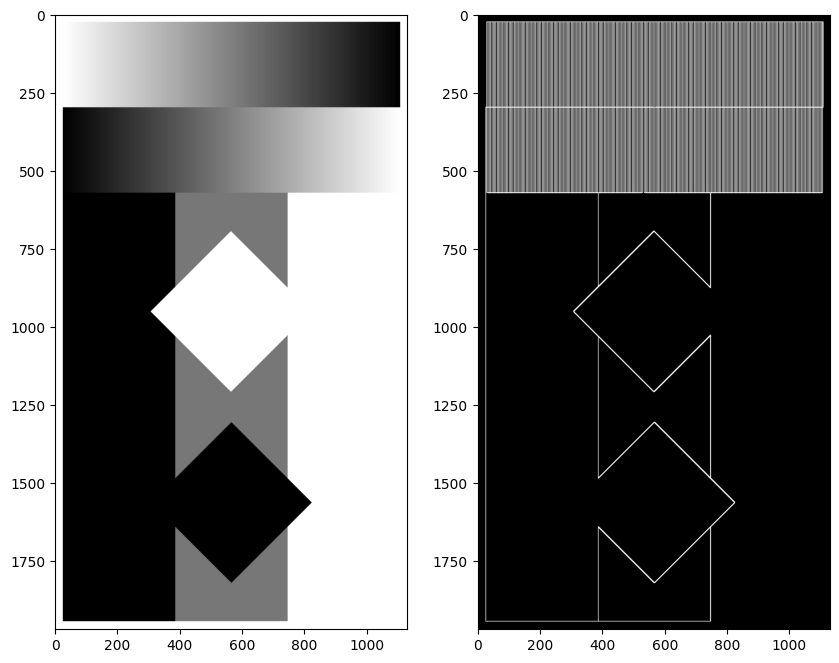

In [63]:
## Exercise 02
from numpy import *
from numpy import random
from scipy.ndimage import filters
from PIL import *
from pylab import *


# implemented function to find outline
def findOutline(input_img, thresholds):
    img_grad_x = zeros(input_img.shape)
    filters.sobel(input_img, 1, img_grad_x)
    img_grad_y = zeros(input_img.shape)
    filters.sobel(input_img, 0, img_grad_y)
    img_grad_xy = sqrt(img_grad_x**2 + img_grad_y**2)

    img_outline = zeros(input_img.shape)
    img_outline[img_grad_xy >= thresholds]=1
    img_outline = uint8(img_outline)
    return img_outline


# declare coefficients
gaussian_coef = 3
gaussed_img_num = 4

# read image to array
img_original = array(Image.open('data/ex04_sample_ver01.png').convert('L'))

# create new fig
figure(figsize=(10,8))

# don't use color
gray()

# plot original image
subplot(1, 2, 1)
imshow(img_original)

# plot outline image
img_outline = findOutline(img_original, 0.1)
subplot(1, 2, 2)
imshow(img_outline)

# show all figs
show()